##  Inital data processing 

In [245]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing

In [246]:
data=pd.read_csv("C://Users//sthakal//OneDrive - George Weston Limited-6469347-MTCAD//Psnal//Ryerson_Big_Data Certification_Final_Project//Data Set//bank-additional-full.csv",sep = ";")
data.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [247]:
# see what type of data it contains
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [248]:
data.isna().count()
# CHECKING missing values

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

In [249]:
data.shape
#rows and columns

(41188, 21)

In [250]:
data.describe()
#Checking the stats of numerical variable

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E928BCA58>]],
      dtype=object)

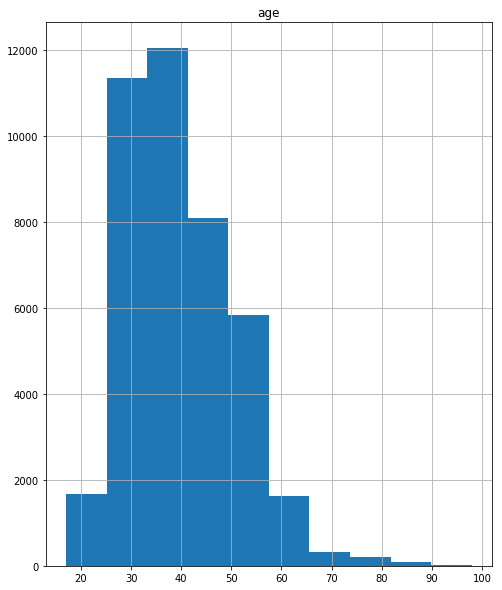

In [251]:
data.hist('age')
#Age histograms

## Checking the counts of Categorical variables 

In [252]:
#we are now seeing the counts of the categorical variable one by one to see the values
#Checking the counts of categorical variables to see what value they are concentrated in 

job_cnt=data['job'].value_counts()
print(job_cnt)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [253]:
data['marital'].value_counts()


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [254]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [255]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [256]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [257]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [258]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [259]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [260]:
data['month'].value_counts()


may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [261]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [262]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [263]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [264]:
data['y'].value_counts()
#understanding the count of the Predictor variable

no     36548
yes     4640
Name: y, dtype: int64

In [265]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

# ## Bivarate Analysis

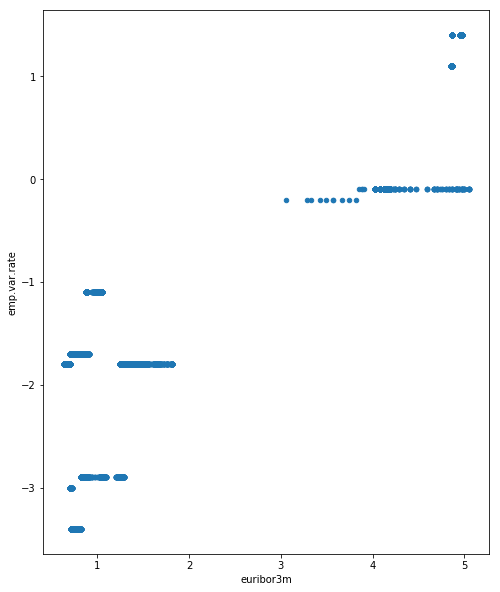

In [266]:
data.plot.scatter('euribor3m', 'emp.var.rate',)

In [267]:
data.corr()
#Checking numerical correlation

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


# # #  Some preprocessing for Bivarate

In [268]:
#Clubbing all basic eduction in one
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])


In [269]:
data['y']=np.where(data['y'] =='yes',1, data['y'])# changing into binary/ 
data['y']=np.where(data['y'] =='no',0, data['y'])

In [270]:
#Checking how the categorical variable is related to the Response variable
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

# # Seeing the relationship of categorical variables with Response Variable

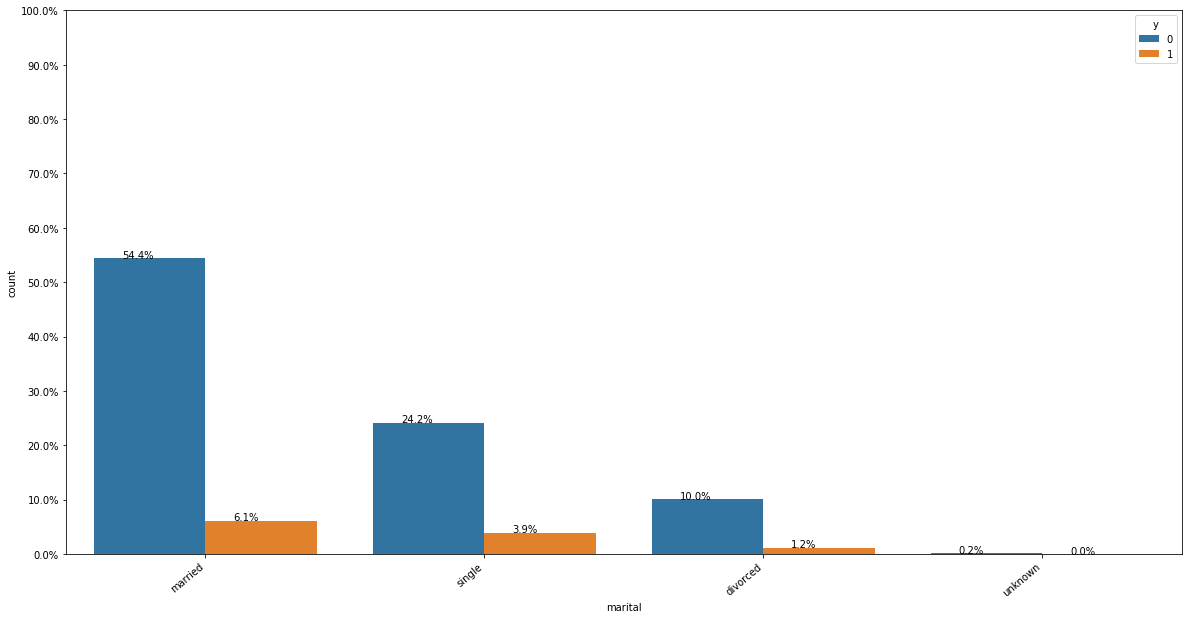

In [271]:
countplot_withY("marital",data)


In [272]:
countplot_withY?

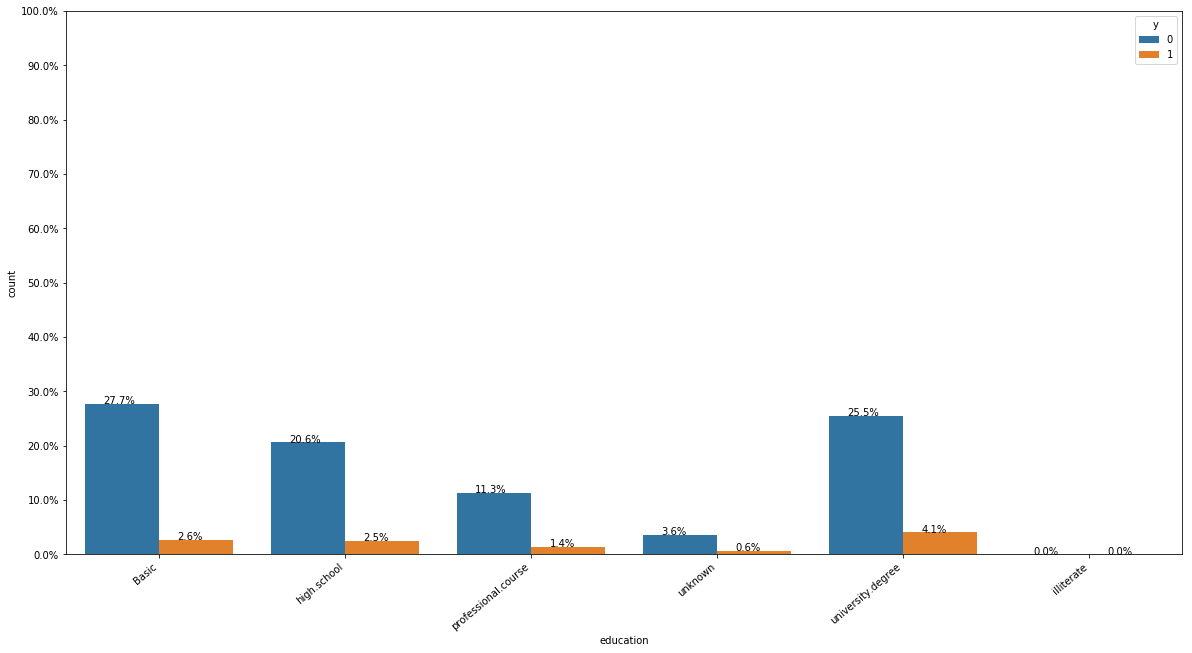

In [273]:
countplot_withY("education",data)

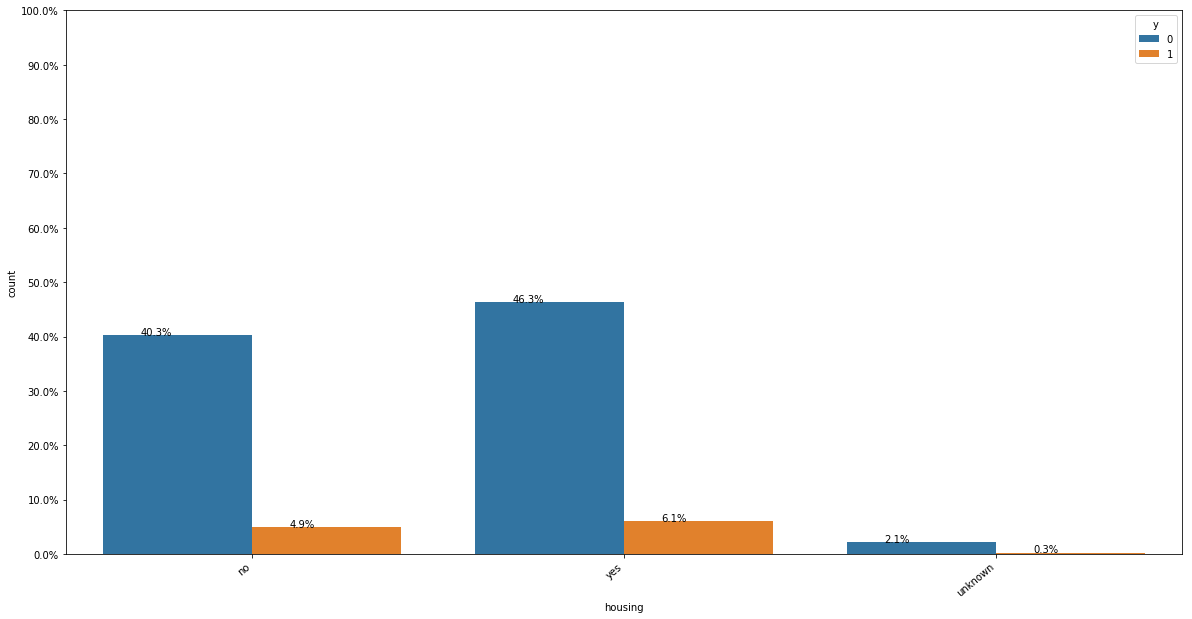

In [274]:
countplot_withY("housing",data)

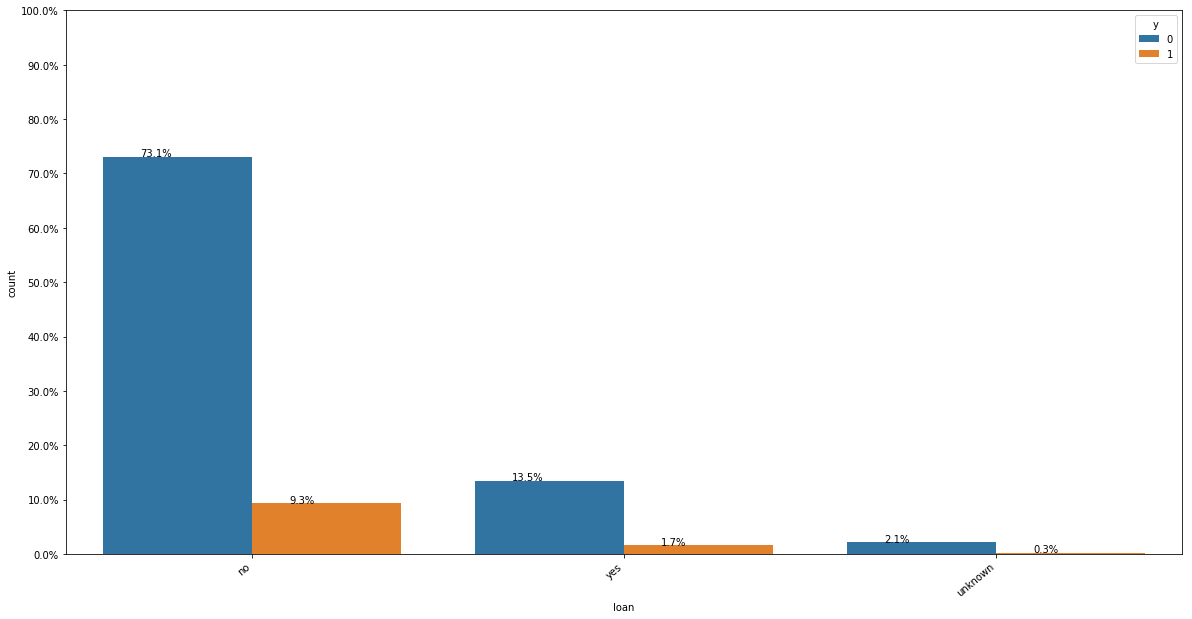

In [275]:
countplot_withY("loan",data)

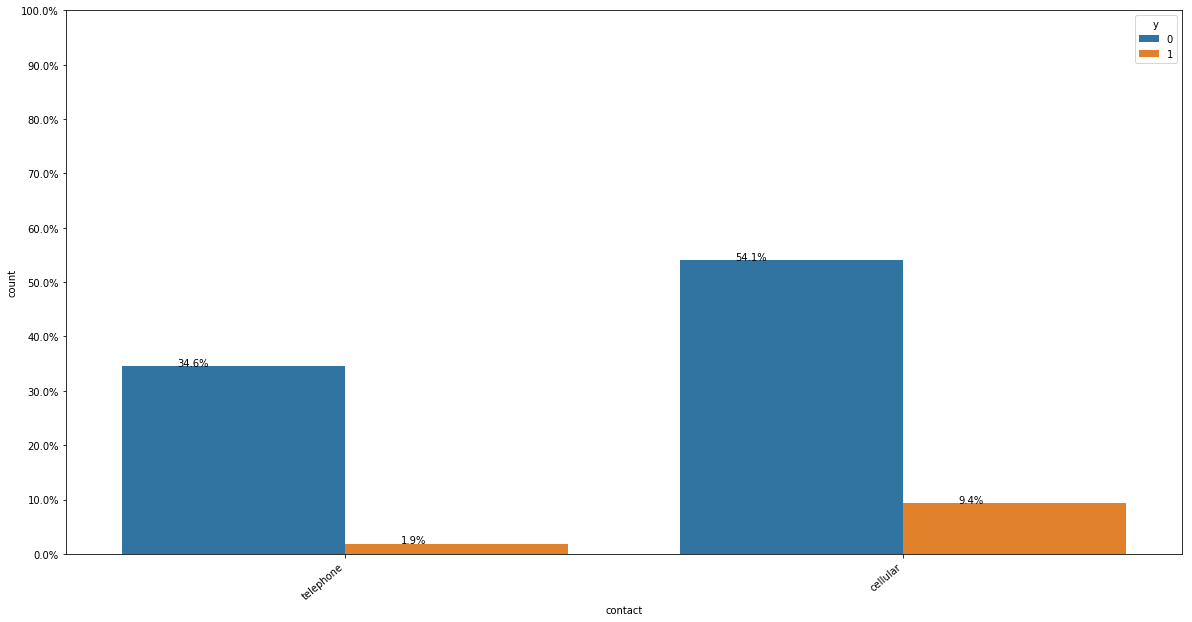

In [276]:
countplot_withY("contact",data)


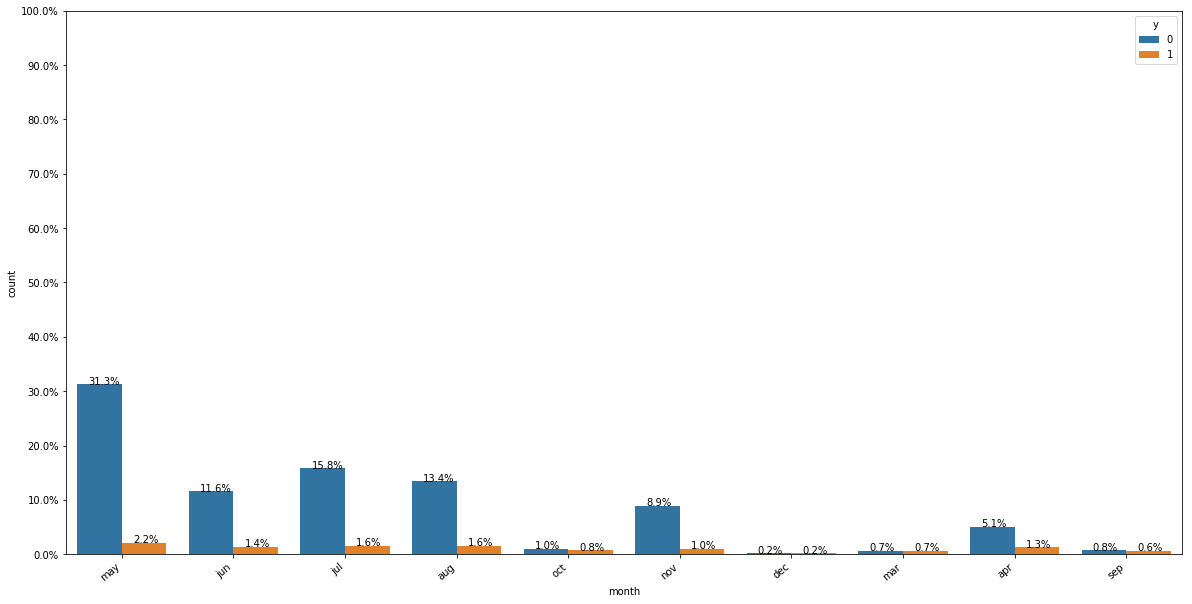

In [277]:
countplot_withY("month",data)

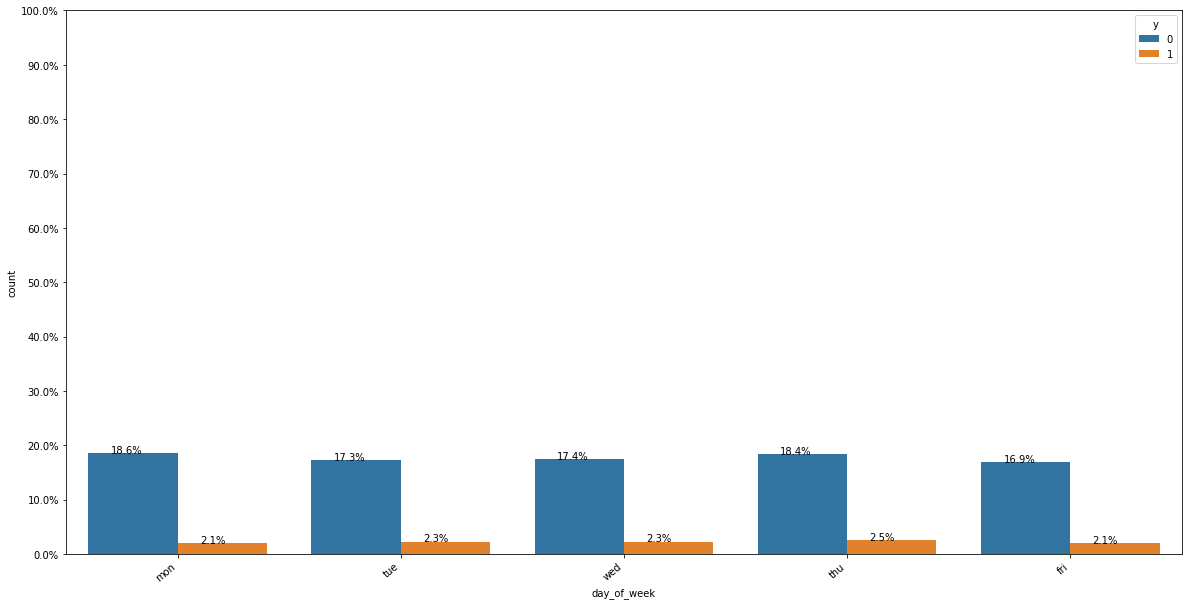

In [278]:
countplot_withY("day_of_week",data)

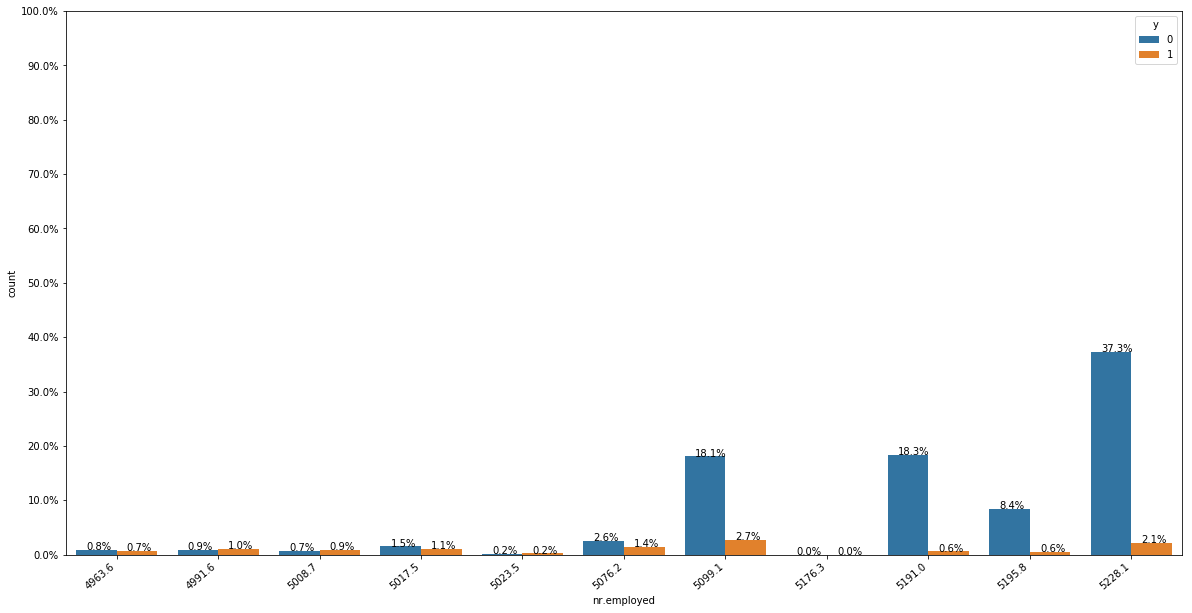

In [279]:
countplot_withY("nr.employed",data)

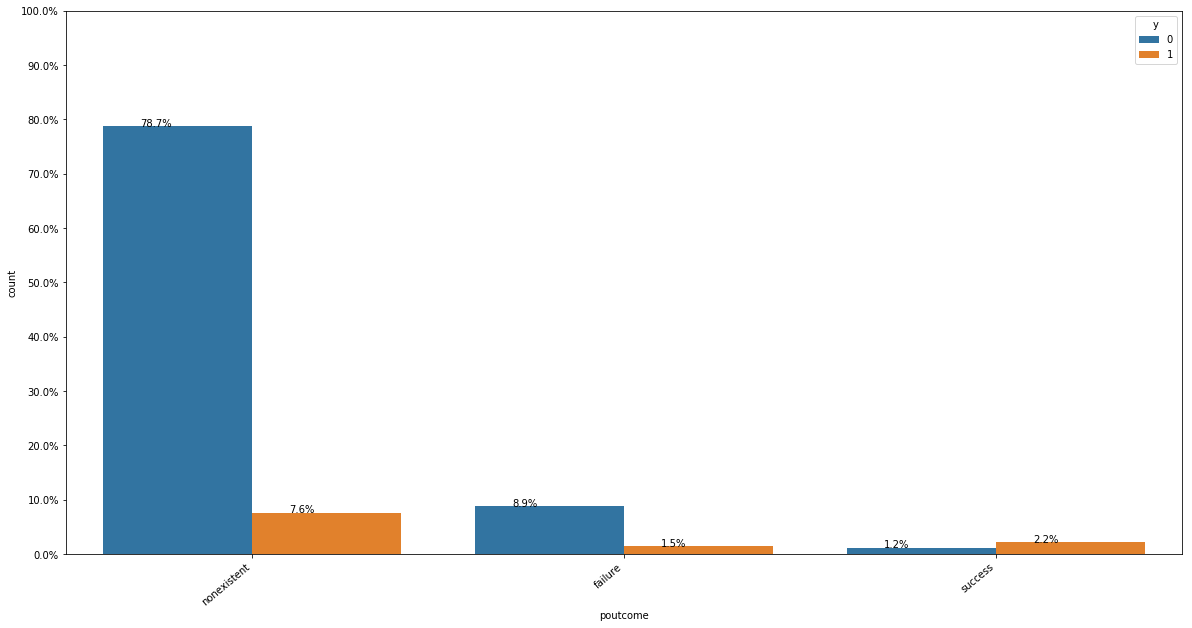

In [280]:
countplot_withY("poutcome",data)

In [281]:
data_response_yes=data[data['y']==1]
#only selecting those dataset where response is yes

In [282]:
data_response_yes.describe()
#Just checking how the numerical variable of success looks like

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# # #  Some preprocessing for model building

In [283]:
#Create dummy variables
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (41188, 20)
Shape of Y: (41188,)


In [284]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)


X Train: (26360, 20)
X CV: (6590, 20)
X Test: (8238, 20)
Y Train: (26360,)
Y CV: (6590,)
Y Test: (8238,)


In [285]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [286]:
# without "duration" column
# As this column is after the fact

#From Train
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)


The shape of the train dataset:  (26360, 19)
The shape of the cv dataset:  (6590, 19)
The shape of the test dataset:  (8238, 19)


In [287]:

# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()


In [288]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [289]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)


Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (26360, 60)
Shape of CV:  (6590, 60)
Shape of test:  (8238, 60)


In [290]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [291]:
X_train.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
9368,31,2,999,0,1.4,94.465,-41.8,4.967,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
6113,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,1,0,0,1,0
2719,41,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,...,0,0,0,0,0,0,1,0,1,0
21296,30,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,0,0,1,0,0,0,0,1,0
15163,39,2,999,0,1.4,93.918,-42.7,4.958,5228.1,0,...,0,0,0,0,1,0,0,0,1,0


In [292]:
# Running the Logistic Regression model
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import time

start = time.time()

# insert some code to do something here


model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score: ", roc_auc_score(y_test, y_pred[:,1]))
end = time.time()
print("Run time [s]: ",end-start)


AUC score:  0.7874636635959017
Run time [s]:  1.0059287548065186


In [293]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=500)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.8997329448895363
Precision: 0.6861538461538461
Recall: 0.235480464625132


In [294]:
from sklearn.model_selection import cross_val_score

In [295]:
Logestic_Regression_Model=LogisticRegression(class_weight='balanced',max_iter=1000)

In [296]:
#Using cross validation for the data we seperated for the purpose
#run 1

import time
start = time.time()
print(cross_val_score(Logestic_Regression_Model,X_cv, y_cv, cv=10))
# insert some code to do something here

end = time.time()
print("Run time [s]: ",end-start)

[0.84066768 0.80576631 0.79817906 0.82549317 0.83459788 0.83308042
 0.82852807 0.81942337 0.83915023 0.82094082]
Run time [s]:  6.635006427764893


In [297]:
#run2

import time
start = time.time()
print(cross_val_score(Logestic_Regression_Model,X_test, y_test, cv=10))
end = time.time()
print("Run time [s]: ",end-start)

[0.80461165 0.82645631 0.81553398 0.8276699  0.8118932  0.83616505
 0.80703883 0.82524272 0.83232078 0.79100851]
Run time [s]:  4.5913002490997314


In [305]:
start = time.time()

mean_cross_val_score_logistic= np.mean(cross_val_score(Logestic_Regression_Model,X_cv, y_cv, cv=10))
std_cross_val_score_logistic=np.std(cross_val_score(Logestic_Regression_Model,X_cv, y_cv, cv=10))
print("The mean cross val score of Logistic Regression is:"+ str(np.round_(mean_cross_val_score_logistic,3)))
print("The Standard Deviation of  Logistic Regression is:"+str(np.round_(std_cross_val_score_logistic,3)))

end = time.time()
print("Run time [s]: ",end-start)

The mean cross val score of Logistic Regression is:0.825
The Standard Deviation of  Logistic Regression is:0.013
Run time [s]:  12.48766303062439


In [306]:
### neural network method


In [307]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [308]:
sc_X = StandardScaler()
sc_X.fit(X_train)
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [309]:
columns_value_new=X_train.columns
test_X_Scaled_Except = pd.DataFrame(X_trainscaled, columns=columns_value_new)

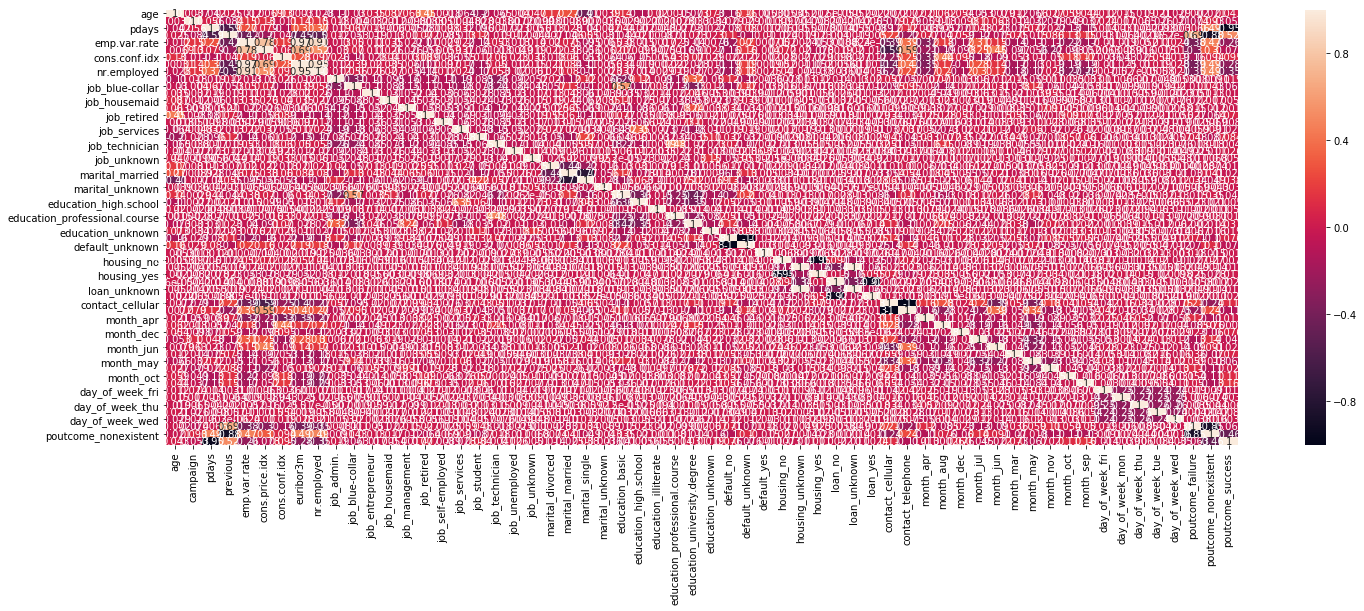

In [310]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(test_X_Scaled_Except.corr(),annot=True);

In [312]:
from sklearn.decomposition import PCA
PCA_data_train =X_trainscaled
PCA_data_test =X_testscaled
pca = PCA(n_components=15)
pca.fit(PCA_data_train)
X_pca_train= pca.fit_transform(PCA_data_train) 
X_pca_test= pca.fit_transform(PCA_data_test) 
principalDf_train = pd.DataFrame(data = X_pca_train)
principalDf_test = pd.DataFrame(data = X_pca_test)

In [313]:
principalDf_train.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-2.497043,0.046395,2.210257,0.807705,-0.486997,-1.257356,0.493053,-1.012544,-1.158545,-0.591440,-1.400103,0.453196,1.092854,-1.442069,-0.635930
1,-1.778482,0.149128,2.042176,0.223557,-0.875591,-1.706006,0.314094,-0.564023,0.199450,-0.345939,1.241336,0.209640,-2.064353,-0.255461,0.169881
2,-2.183393,2.292706,0.700497,-0.099743,-0.929288,-1.476292,0.236782,0.535660,0.465353,-0.129632,-1.623457,-0.257040,-2.272350,0.187232,0.123319
3,-0.973170,-2.266912,-1.226679,1.199715,0.088081,1.507342,-0.637140,1.426862,0.969482,2.933268,0.716648,1.620080,1.472660,-0.882573,-0.713811
4,-1.356171,0.206941,-2.257548,-0.402906,-0.488603,1.910939,0.279471,0.327530,-1.062663,-0.429698,-2.047317,-1.237365,-0.637826,0.223391,0.464272
5,3.840331,1.874349,-0.387108,-1.711629,-0.982290,0.560890,-0.850451,-0.064931,-1.403221,-0.991715,0.581049,2.168558,-1.631779,-0.291721,-1.942603
6,-1.051397,-1.245991,-1.091416,1.681713,-0.157401,-1.058452,1.422463,-0.171194,-0.115636,-0.809058,1.013513,-0.133231,-2.179713,-0.301651,0.224480
7,4.865399,-1.230331,0.301805,-1.972052,-0.854190,0.930516,-0.377125,-1.412174,-1.305806,0.383432,-0.445555,1.818358,2.108145,-0.289325,-1.591863
8,2.471014,-0.078277,-1.439621,0.809316,-0.202708,1.113854,-0.440478,0.261209,-2.760368,-2.199331,-0.973013,3.312428,-0.185969,1.196463,1.562180
9,-1.562321,-0.023942,1.037075,0.404993,1.844372,-1.120324,-2.936820,-2.563323,1.262887,-0.890056,-0.648966,1.024406,0.133564,-0.516227,0.201169


In [314]:

import time
start = time.time()

from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1,max_iter=500).fit(principalDf_train, y_train)
y_pred=clf.predict(principalDf_test)
print(clf.score(principalDf_test, y_test))


end = time.time()
print("Run time [s]: ",end-start)

0.7847778587035689
Run time [s]:  182.91237878799438


In [315]:

start = time.time()
mean_cross_val_score_NN= np.mean(cross_val_score(clf,X_cv, y_cv, cv=10))
std_cross_val_score_NN=np.std(cross_val_score(clf,X_cv, y_cv, cv=10))

print("The mean cross val score of Neural Network is:"+ str(np.round_(mean_cross_val_score_NN,3)))
print("The Standard Deviation of  cross val score of Neural Network is:"+str(np.round_(std_cross_val_score_NN,3)))

end = time.time()
print("Run time [s]: ",end-start)

The mean cross val score of Neural Network is:0.896
The Standard Deviation of  cross val score of Neural Network is:0.008
Run time [s]:  200.81286001205444


In [316]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7291
           1       0.12      0.14      0.13       947

    accuracy                           0.78      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.78      0.79      8238



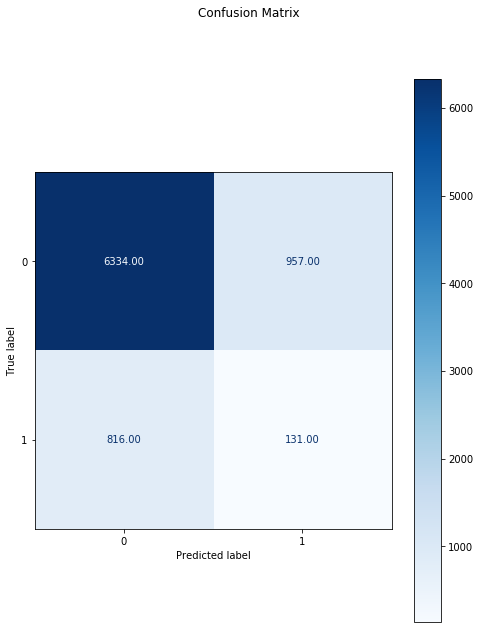

In [317]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf, principalDf_test, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

In [318]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [319]:
Decison_tree_model=dtc.fit(X_train, y_train)

In [320]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [321]:
 evaluate_model(Decison_tree_model, X_test, y_test)

{'acc': 0.8352755523185239,
 'prec': 0.30438931297709926,
 'rec': 0.3368532206969377,
 'f1': 0.3197994987468672,
 'kappa': 0.2263636739857956,
 'fpr': array([0.        , 0.09998628, 0.10656974, 0.10725552, 0.10752983,
        1.        ]),
 'tpr': array([0.        , 0.33685322, 0.34002112, 0.34002112, 0.34002112,
        1.        ]),
 'auc': 0.6173593255604217,
 'cm': array([[6562,  729],
        [ 628,  319]], dtype=int64)}

In [322]:
###decison trees
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=0, splitter='best')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [323]:
Decison_tree_model=dtc.fit(X_train, y_train) #training the model

In [324]:
# Evaluate Model

import time
start = time.time()



dtc_eval = evaluate_model(Decison_tree_model, X_cv, y_cv)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])


end = time.time()
print("Run time [s]: ",end-start)

Accuracy: 0.8423368740515933
Precision: 0.30562659846547313
Recall: 0.3251700680272109
F1 Score: 0.31509558338826626
Cohens Kappa Score: 0.22610706539368797
Area Under Curve: 0.6192481569912337
Confusion Matrix:
 [[5312  543]
 [ 496  239]]
Run time [s]:  0.06317543983459473


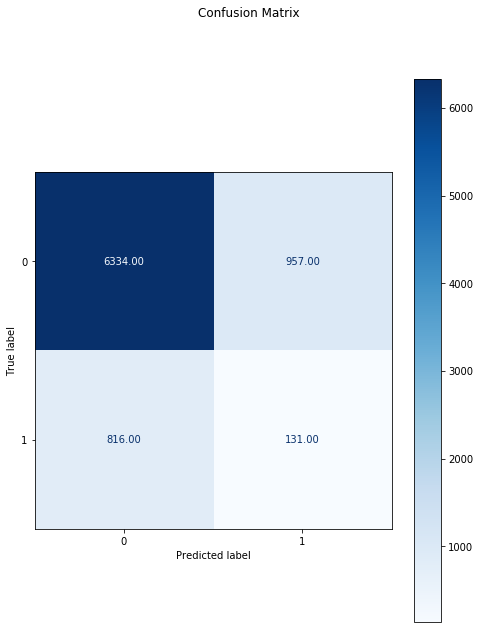

In [325]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(clf, principalDf_test, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

In [326]:
import time
start = time.time()

mean_cross_val_score= np.mean(cross_val_score(Decison_tree_model,X_cv, y_cv, cv=10))
std_cross_val_score=np.std(cross_val_score(dtc,X_cv, y_cv, cv=10))
print("The mean cross val score of Decison Tree is:"+ str(np.round_(mean_cross_val_score,3)))
print("The Standard Deviation of Decison Tree is:"+str(np.round_(std_cross_val_score)))

end = time.time()
print("Run time [s]: ",end-start)

The mean cross val score of Decison Tree is:0.84
The Standard Deviation of Decison Tree is:0.0
Run time [s]:  1.9679393768310547
